# Дискретные случайные процессы и временные ряды.
## Задание 3.9

**Правила:**

Выполненную работу нужно отправить телеграм-боту  `@miptstats_ad21_bot`
* Дедлайн см. в телеграм-боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* По практическим задачам прислать нужно ноутбук.
* Теоретические задачи необходимо оформить в tex’е и прислать `pdf` или же прислать фотку в правильной ориентации рукописного решения, где все четко видно.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Не забывайте делать пояснения и выводы.

--------------

### Задача 1.

Пусть $(X, Y)$ &mdash; скрытая марковская модель. Докажите формулы (см. презентацию с лекции)

$\beta_k(t) = \sum\limits_{l=1}^r p_{kl} f_l(Y_{t+1}) \beta_l(t+1),$

$L_k(t) = \frac{\alpha_k(t) \beta_k(t)}{\mathsf{P}(Y_1=y_1, ..., Y_T=y_T)},$

$H_{kl}(t) = \frac{p_{kl} f_l(y_{t+1}) \alpha_k(t) \beta_l(t+1)}{\mathsf{P}(Y_1=y_1, ..., Y_T=y_Y)}.$

### Задача 2.

Пусть $(X, Y)$ --- скрытая марковская модель.
Для двух последовательностей скрытых состояний $x$ и $z$ (которые соответствуют некоторой траектории на графе развертки) определим величину $\rho(x, z) = \sum\limits_{t=1}^T I\{ x_t = z_t \}$ --- количество общих состояний.
Тогда $\mathsf{E}(\rho(X, z) | Y)$ имеет смысл среднего числа общих вершин у случайной траектории и заданной траектории $z$ при условии наблюдаемой последовательности $y$.
Обозначим $X_{1..T} = (X_1, ..., X_T)$ и $Y_{1..T} = (Y_1, ..., Y_T)$.
      
  a) Докажите, что величина $\mathsf{E}(\rho(X_{1..T}, z) | Y_{1..T})$ достигает 
максимума по $z$, если $z$ &mdash; траектория forward-backward.

  б)  Опишите полиномиальный алгоритм, вычисляющий $\mathsf{E}(\rho(X_{1..T}, z) | Y_{1..T})$ и $\mathsf{D}(\rho(X_{1..T}, z) | Y_{1..T})$ для произвольной траектории $z$.
        

### Задача 3.
 Приведите пример скрытой марковской модели, для которой
    а) условная вероятность траектории forward-backward равна нулю при условии наблюдаемой последовательности.
    б) траектории forward-backward и Витерби имеют долю общих вершин меньше любого наперед заданного числа

### Задача 4.
Пусть $X = (X_n, n\in \mathbb{Z}_+)$ --- однородная марковская цепь с двумя состояниями, матрицей переходных вероятностей $P$ и стационарным распределением $\Pi$, а $Y = (Y_n, n\in \mathbb{Z}_+)$ --- наблюдаемый случайный процесс. Пусть пара $(X, Y)$ образует скрытую марковскую модель, причем условная плотность $Y_n$ при условии $X_n = 1$ равна $f_1(y)$, а при условии $X_n = 2$ равна $g_2(y) = \alpha f_2(y) + (1-\alpha) f_3(y)$, где $f_2(x)$ и $f_3(x)$ --- некоторые плотности, а $\alpha \in (0, 1)$.
Задайте марковскую цепь $Z = (Z_n, n\in \mathbb{Z}_+)$ так, что пара $(Z, Y)$ будет образовывать скрытую марковскую модель, причем условная плотность $Y_n$ при условии $Z_n = i$ равна $f_i(y)$. Покажите, что $(Z, Y)$ действительно является скрытой марковской моделью.



### Задача 5. Скрытые марковские модели 

Изучите [пример](https://wiki.yandex.ru/homepage/ds-potok-3-kurs-vesna/2022/.files/hmm.ipynb) [(pdf)](https://wiki.yandex.ru/homepage/ds-potok-3-kurs-vesna/2022/.files/hmm...pdf) на библиотеку `hmmlearn`. Выполните те же операции для следующих двух случаев

* скрытая марковская цепь имеет три скрытых состояния;

* распределение $Y_j$ при условии $X_j$ является двумерным гауссовским.

* скрытая марковская цепь имеет три скрытых состояния.

In [40]:
import numpy as np
import sys
from hmmlearn import hmm
from sklearn.metrics import f1_score, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
# Объявление скрытой марковской модели с двумя скрытыми состояниями, 
# в которой предполагается, что каждое состояние (Х) может генерировать 
# гауссовский случайный вектор с произвольной матрицей ковариаций (Y).
# Используется метод Витерби.
model = hmm.GaussianHMM(n_components=3, covariance_type='full', 
                        algorithm='viterbi', random_state=16)

# Параметры марковской цепи - начальное состояние и матрица переходных вероятностей
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.2, 0.4, 0.4]])

# Параметры условных распределений Y_j при условии X_j - вектора средних и
# матрица ковариаций по количеству состояний. Поскольку в данном случае
# распределения одномерные, ниже записаны два вектора размерности 1
# и две матрицы размерности 1x1
model.means_ = np.array([[0.0], [3.0], [7.0]])
model.covars_ = np.array([[[1]], [[1]], [[1]]])

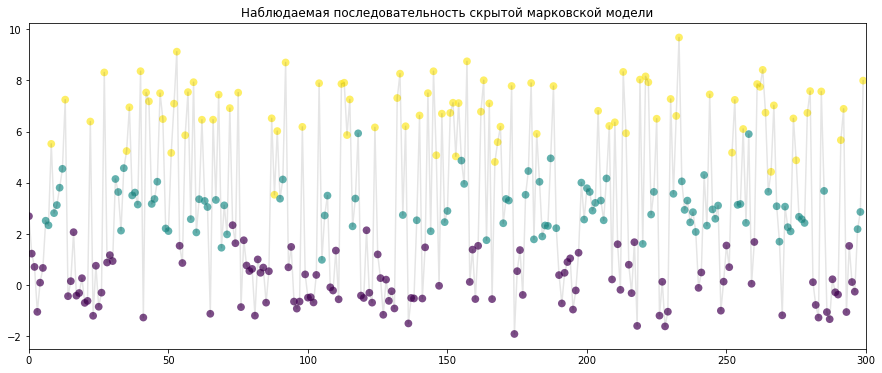

array([0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0,
       2, 1, 2, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 1, 2, 0, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 0,
       0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 1,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2])

In [64]:
size = 300
Y, X = model.sample(size)  # Y наблюдаемы, X скрытые

plt.figure(figsize=(15, 6))
plt.plot(np.arange(size), Y[:, 0], color='black', alpha=0.1)
plt.scatter(np.arange(size), Y[:, 0], c=np.array(X), lw=0, s=60, alpha=0.7)
plt.xlim((0, size))
plt.title('Наблюдаемая последовательность скрытой марковской модели')
plt.show()
X

In [65]:
# Объявление скрытой марковской модели, в которой при оценке параметров
# будет производиться не более n_iter итераций EM-алгоритма.
remodel = hmm.GaussianHMM(n_components=3, covariance_type="full",
                          n_iter=100, algorithm='viterbi', random_state=16)

# Оценка параметров ("обучение")
remodel.fit(Y)

# Оценка ("предсказание") значений скрытых состояний
X_predicted = remodel.predict(Y)
X_predicted

array([2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2, 2, 0,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 2, 1, 0, 0, 0, 2, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0,
       0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       2, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1], d

In [66]:
# видно, что классы переставились, а из лекции нам известно, что скрытая гаусссовская модель восстанавливает
# классы с точностью до перестановки, поэтому переставим классы, чтобы они были в правильном порядке
X_predicted_perm = X_predicted.copy()
X_predicted_perm[X_predicted == 2] = 1
X_predicted_perm[X_predicted == 1] = 2

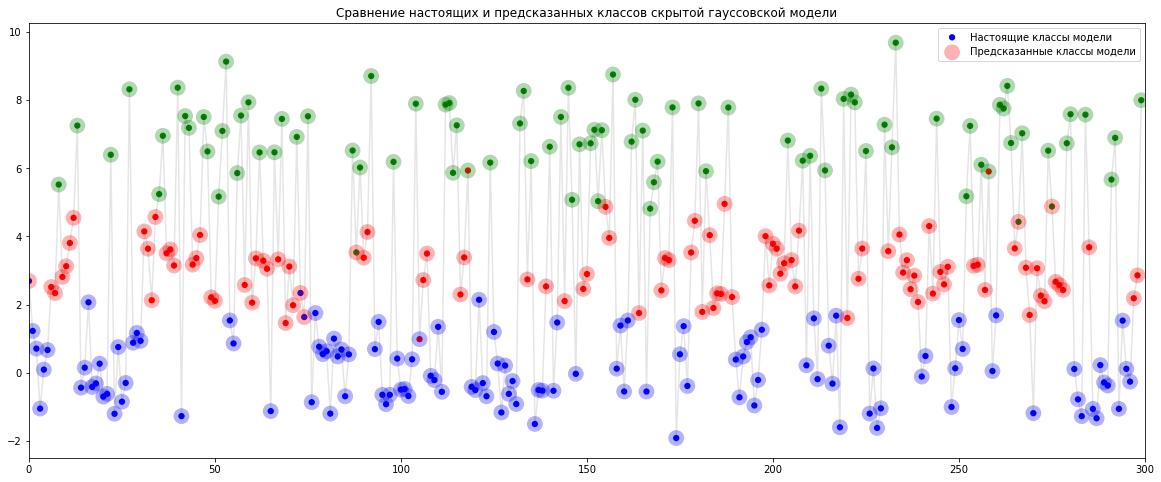

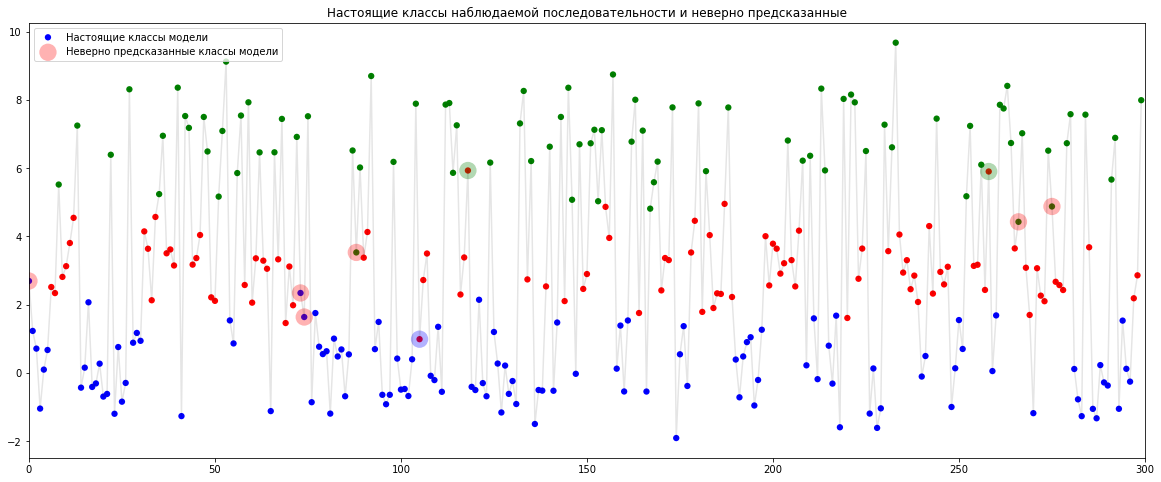

In [67]:
colors = np.array(['blue', 'red', 'green'])

# Состояния определяются с точностью до их перестановки.
# При необходимости меняем местами состояния
if (X != X_predicted_perm).sum() > size / 2:
    X_predicted = 1 - X_predicted

plt.figure(figsize=(20, 8))
plt.plot(np.arange(size), Y[:, 0], color='black', alpha=0.1)
plt.scatter(np.arange(size), Y[:, 0], c=colors[np.array(X)], 
            lw=0, s=40, alpha=1, label='Настоящие классы модели')
plt.scatter(np.arange(size), Y[:, 0], c=colors[np.array(X_predicted_perm)], 
            lw=0, s=250, alpha=0.3, label='Предсказанные классы модели')
plt.xlim((0, size))
plt.title('Сравнение настоящих и предсказанных классов скрытой гауссовской модели')
plt.legend()
plt.show()

plt.figure(figsize=(20, 8))
plt.plot(np.arange(size), Y[:, 0], color='black', alpha=0.1)
plt.scatter(np.arange(size), Y[:, 0], c=colors[np.array(X)], 
            lw=0, s=40, alpha=1, label='Настоящие классы модели')
plt.scatter(np.arange(size)[X != X_predicted_perm], Y[:, 0][X != X_predicted_perm], 
            c=colors[np.array(X_predicted_perm)[X != X_predicted_perm]], 
            lw=0, s=300, alpha=0.3, label='Неверно предсказанные классы модели')
plt.xlim((0, size))
plt.title('Настоящие классы наблюдаемой последовательности и неверно предсказанные')
plt.legend()
plt.show()

In [68]:
f1_score(X, X_predicted_perm, average='macro'), accuracy_score(X, X_predicted_perm)

(0.9690596523411413, 0.97)

* распределение $Y_j$ при условии $X_j$ является двумерным гауссовским.

In [69]:
# Объявление скрытой марковской модели с двумя скрытыми состояниями, 
# в которой предполагается, что каждое состояние (Х) может генерировать 
# гауссовский случайный вектор с произвольной матрицей ковариаций (Y).
# Используется метод Витерби.
model = hmm.GaussianHMM(n_components=3, covariance_type='full', 
                        algorithm='viterbi', random_state=16)

# Параметры марковской цепи - начальное состояние и матрица переходных вероятностей
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.2, 0.4, 0.4]])

# Параметры условных распределений Y_j при условии X_j - вектора средних и
# матрица ковариаций по количеству состояний. Поскольку в данном случае
# распределения двумерные, ниже записаны два вектора размерности 2
# и две матрицы размерности 2x2
model.means_ = np.array([[0.0, 5.0], [3.0, 8.0], [6.0, 4.0]])
model.covars_ = np.array([[[1, 0.5], [0.5, 2]], [[1, 0.5], [0.5, 2]], [[1, 0.5], [0.5, 2]]])

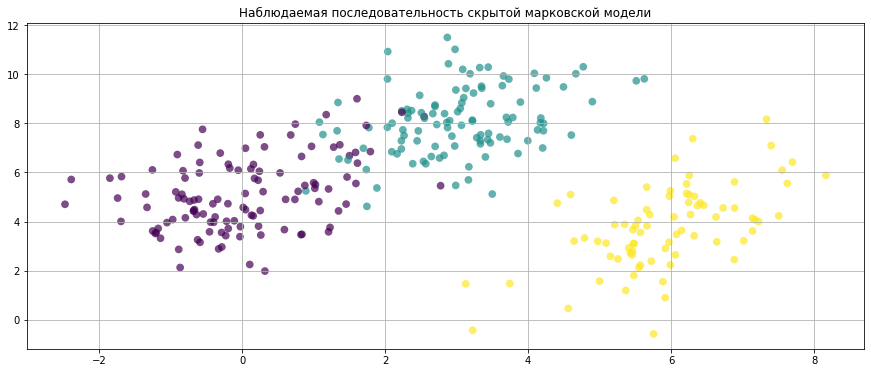

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 1,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1,
       0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1])

In [70]:
size = 300
Y, X = model.sample(size)  # Y наблюдаемы, X скрытые

plt.figure(figsize=(15, 6))
plt.scatter(Y[:, 0], Y[:, 1], c=np.array(X), lw=0, s=60, alpha=0.7)
plt.title('Наблюдаемая последовательность скрытой марковской модели')
plt.grid()
plt.show()
X

In [71]:
# Объявление скрытой марковской модели, в которой при оценке параметров
# будет производиться не более n_iter итераций EM-алгоритма.
remodel = hmm.GaussianHMM(n_components=3, covariance_type="full",
                          n_iter=100, algorithm='viterbi', random_state=16)

# Оценка параметров ("обучение")
remodel.fit(Y)

# Оценка ("предсказание") значений скрытых состояний
X_predicted = remodel.predict(Y)
X_predicted

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 2, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0,
       2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2,
       0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1,
       0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0], d

In [72]:
# видно, что классы переставились, а из лекции нам известно, что скрытая гаусссовская модель восстанавливает
# классы с точностью до перестановки, поэтому переставим классы, чтобы они были в правильном порядке
X_predicted_perm = X_predicted.copy()
X_predicted_perm[X_predicted == 0] = 1
X_predicted_perm[X_predicted == 1] = 0

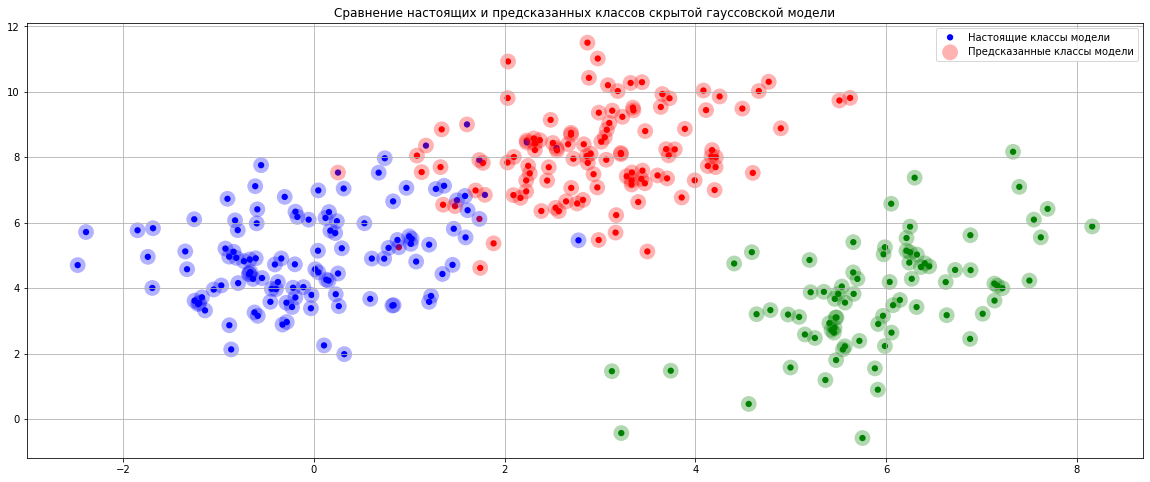

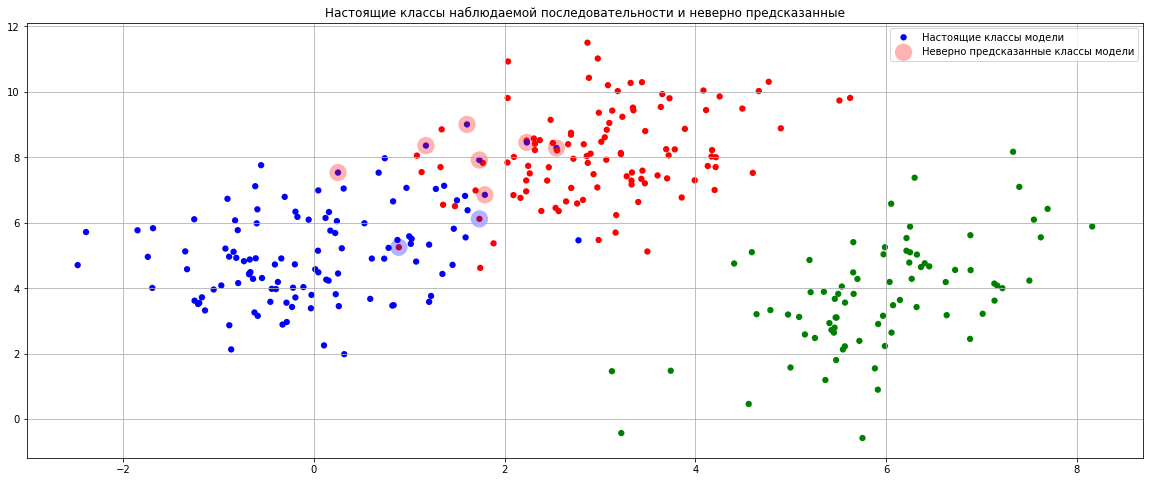

In [73]:
colors = np.array(['blue', 'red', 'green'])

# Состояния определяются с точностью до их перестановки.
# При необходимости меняем местами состояния
if (X != X_predicted_perm).sum() > size / 2:
    X_predicted = 1 - X_predicted

plt.figure(figsize=(20, 8))
plt.scatter(Y[:, 0], Y[:, 1], c=colors[np.array(X)], 
            lw=0, s=40, alpha=1, label='Настоящие классы модели')
plt.scatter(Y[:, 0], Y[:, 1], c=colors[np.array(X_predicted_perm)], 
            lw=0, s=250, alpha=0.3, label='Предсказанные классы модели')
plt.title('Сравнение настоящих и предсказанных классов скрытой гауссовской модели')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(20, 8))
plt.scatter(Y[:, 0], Y[:, 1], c=colors[np.array(X)], 
            lw=0, s=40, alpha=1, label='Настоящие классы модели')
plt.scatter(Y[:, 0][X != X_predicted_perm], Y[:, 1][X != X_predicted_perm], 
            c=colors[np.array(X_predicted_perm)[X != X_predicted_perm]], 
            lw=0, s=300, alpha=0.3, label='Неверно предсказанные классы модели')
plt.title('Настоящие классы наблюдаемой последовательности и неверно предсказанные')
plt.legend()
plt.grid()
plt.show()

In [74]:
f1_score(X, X_predicted_perm, average='macro'), accuracy_score(X, X_predicted_perm)

(0.9729724245683095, 0.97)

**Вывод:** как показали результаты, модель хорошо работает с линейно разделимыми наблюдаемыми последовательностями. Заметим, что в двумерном случае даже при более близком распределении линейная разделимость стала немного сильнее, засчет чего модель смогла даже немного лучше справиться, чем в одномерном. Из этого можно сделать вывод, что чем больше размерность наблюдаемой последовательности, тем, скорее всего, у нас больше информации о скрытой последовательности, значит, тем точнее предсказывает модель.

Кроме гауссовского случая в библиотеке реализовано два других

* `hmm.GMMHMM` --- распределение $Y_j$ при условии $X_j$ является смесью гауссовских распределений, 
* `hmm.MultinomialHMM` --- распределение $Y_j$ при условии $X_j$ является дискретным.

### Задача 6. Part-of-speech tagging 

Теперь вам нужно самостоятельно реализовать метод распознавания частей речи для слов в предложении на основе скрытых марковских моделей. Метод реализовать можно с помощью библиотеки `hmmlearn`, но хранение разреженных матриц в в формате обычных матриц потребует большого количества памяти, поэтому на этот раз реализовать HMM придется самостоятельно. 

Будем считать, что каждый следующий тег непосредственно зависит только от двух предыдущих. Такая модель является марковской цепью, если в качестве состояний рассматривать все возможные пары тегов, причем матрица переходных вероятностей будет разреженной. Чтобы однозначно задать матрицу переходных вероятностей достаточно определить вероятности $\mathsf{P}(X_3=tag_3\; \left|\; X_2=tag_2, X_1=tag_1\right)$, в качестве которых возьмем их оценку максимального правдоподобия (см. семинар). Сделайте так же оценку вероятностей $\mathsf{P}(Y_i=word\; \left|\; X_i=tag\right)$ для определения распределения слов для каждого тега.

Для удобства реализации можно считать, что перед началом предложения и после конца предложения находится несколько "пустых" тегов.

После того, как определена модель, нужно реализовать функцию, которая по заданному предложению для данной модели будет находить траекторию Витерби. Эта траектория и будет являться оценкой последовательности тегов для данного предложения. Посчитайте точность определения тегов на тестовом наборе данных.

**Данные** возьмите такие же, как в примере с семинара.

Сравните точность вашей модели с простой моделью, которая была показана на семинаре, а так же со следующими встроенными моделям:

In [75]:
import nltk  # sudo pip3 install nltk
from collections import Counter, defaultdict

In [77]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [78]:
from nltk.corpus import conll2000

In [79]:
train_sents = conll2000.tagged_sents()[:8000]
test_sents = conll2000.tagged_sents()[8000:]

In [80]:
unigram_tagger = nltk.UnigramTagger(train_sents)
bigram_tagger = nltk.BigramTagger(train_sents)
combined_bigram_tagger = nltk.BigramTagger(train_sents, backoff=unigram_tagger)

### ___

Будем считать, что каждый следующий тег непосредственно зависит только от двух предыдущих. Такая модель является марковской цепью, если в качестве состояний рассматривать все возможные пары тегов, причем матрица переходных вероятностей будет разреженной. Чтобы однозначно задать матрицу переходных вероятностей достаточно определить вероятности $\mathsf{P}(X_3=tag_3\; \left|\; X_2=tag_2, X_1=tag_1\right)$, в качестве которых возьмем их оценку максимального правдоподобия (см. семинар). Сделайте так же оценку вероятностей $\mathsf{P}(Y_i=word\; \left|\; X_i=tag\right)$ для определения распределения слов для каждого тега.

$$P(X_3=tag_3\; \left|\; X_2=tag_2, X_1=tag_1\right)= \frac{P(tag_1, tag_2, tag_3)}{P(tag_1, tag_2)}, \widehat{P} = \frac{\#(tag_1, tag_2, tag_3)}{\#(tag_1, tag_2)}.$$
$$P(Y_i=word\; \left|\; X_i=tag\right) = \frac{P(word, tag)}{P(tag)}, \widehat{P} = \frac{\#(word, tag)}{\#(tag)}.$$
Начальное распределение: $$\widehat{P}(tag_1, tag_2) = \frac{\#(tag_1, tag_2)}{\#(all \ tags)}.$$

In [ ]:
class ObviousPOSTagger:
    def fit(self, train_sents):
        '''Оценка условных вероятностей по предожениям из train_sents.'''
        
        # Создание словаря {(слово, тег): количество}
        self.distr_y = defaultdict(Counter) # shape: (n, n_words)

        # Создание словаря тегов
        n_tags = 0
        num_tags = {'' : 0}
        for t_sent in train_sents:
            for word, tag in t_sent:
                if tag is not in tags:
                    tags.update({tag : n_tags})
                    n_tags += 1
                    
                self.distr_y[tag][word] += 1
                
        # Нормировка, чтобы были частоты --- оценки вероятности P(Y_i = word | X_i = tag)
        for tag in self.distr_y:
            sum_values = sum(self.distr_y[tag].values())
            for word in self.distr_y[tag]:
                self.distr_y[tag][word] /= sum_values
                
        self.n = n_tags + 1                        
        # Создание количеств троек (tag_1, tag_2, tag_3)
        tag_threes = np.zeros(shape=(self.n, self.n, self.n))
        for t_sent in train_sents:
            # считаем, что изначально есть 2 пустых тега
            pre_previous_tag = ''
            previous_tag = ''
            for i, word, tag in enumerate(t_sent):
                tag_three = [num_tags[pre_previous_tag], num_tags[previous_tag], num_tags[tag]]
                self.tag_threes[tag_three[0], tag_three[1], tag_three[2]] += 1
                pre_previous_tag = previous_tag
                previous_tag = tag
               
            # последние 2 итерации: (pre_pre_last_tag, pre_last_tag, last_tag) -> (pre_last_tag, last_tag, '')
            # и (pre_last_tag, last_tag, '') -> (last_tag, '', '')
            tag = ''
            tag_three = [num_tags[pre_previous_tag], num_tags[previous_tag], num_tags[tag]]
            tag_threes[tag_three[0], tag_three[1], tag_three[2]] += 1
            pre_previous_tag = previous_tag
            previous_tag = tag
            
            tag = ''
            tag_three = [num_tags[pre_previous_tag], num_tags[previous_tag], num_tags[tag]]
            tag_threes[tag_three[0], tag_three[1], tag_three[2]] += 1
            pre_previous_tag = previous_tag
            previous_tag = tag
            
        # Создание количеств пар (tag_1, tag_2)
        tag_pairs = np.sum(tag_threes, axis=2).reshape((tag_threes.shape[0], tag_threes.shape[1], 1))
        # начальное распределение
        self.initial_distr = tag_pairs / np.sum(tag_pairs) # shape: (n, n)
        
        # ОМП для частот переходов (tag_1, tag_2) -> (tag_2, tag_3): P(tag_1, tag_2, tag_3) / P(tag_1, tag_2)
        self.transition_prob = np.nan_to_num(tag_threes / tag_pairs) # shape: (n, n, n)
                
                
    def tagging(self, sent):
        '''Каждому слову из предложений sent сопоставляет тег.'''
        tags = []
        dp = np.zeros(shape(len(sent) - 1, self.n, self.n))
        
        prev_word = sent[0]
        word = sent[1]
        if prev_word not in self.distr_y.values():
            prev_f_y = np.ones(shape=(self.n) / self.n)
        else:
            prev_f_y = distr_y[:, prev_word]
        if word not in self.distr_y.values():
            f_y = np.ones(shape=(self.n) / self.n)
        else:
            f_y = distr_y[:, word]
            
        f = prev_f_y.reshape((-1, 1)) @ f_y.reshape((1, -1))
        dp[0] = np.log(f) + np.log(self.initial_distr) 
        prev_word = word
        
        for t, word in enumerate(sent[2:], start=1):
            if prev_word not in self.distr_y.values():
                prev_f_y = np.ones(shape=(self.n) / self.n)
            else:
                prev_f_y = distr_y[:, prev_word]
            if word not in self.distr_y.values():
                f_y = np.ones(shape=(self.n) / self.n)
            else:
                f_y = distr_y[:, word]

            f = prev_f_y.reshape((-1, 1)) @ f_y.reshape((1, -1))
            
            g = np.log(f).reshape((1, self.n, -1)) + np.log(self.transition_prob) # (n, n, n) (tag_1, tag_2, tag_3)
#             dp[t] = np.max(dp[t - 1] + )
            
            tags.append(self.model[word].most_common(1)[0][0] if word in self.model else 'NN')
        return list(zip(sent, tags))